In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
from nltk.corpus import stopwords

from multiprocessing import Pool
from tqdm import tqdm

import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
random.seed(42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 55 kB 1.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.2 MB 6.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=d19031665343a9e2dad060c9e353bd96f37d00666f569b7b61591ab1d88e0b5e
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('train_dl.csv')
df

bank                                              feeds  \
0        unicreditbank  –Ø –æ—á–µ–Ω—å —Ä–µ–¥–∫–æ –ø–æ–ª—å–∑—É—é—Å—å –±–∞–Ω–∫–æ–≤—Å–∫–∏–º–∏ –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏...   
1          fk_otkritie  –Ø –≤–º–µ—Å—Ç–µ —Å –∂–µ–Ω–æ–π 15.11.2019 –æ–±—Ä–∞—Ç–∏–ª—Å—è –≤ –æ—Ç–¥–µ–ª–µ...   
2             alfabank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å.–°–µ–≥–æ–¥–Ω—è 27.12.2018 –≥ –æ–∫–æ–ª–æ 15.40-1...   
3                  vtb  "–ì–¥–µ –∫–∞—Ä—Ç–æ—á–∫—É –æ—Ç–∫—Ä—ã–≤–∞–ª–∏, —Ç—É–¥–∞ –∏ –∏–¥–∏—Ç–µ..." - —ç—Ç...   
4        promsvyazbank  –ü—Ä–∏ –ø–æ–∫—É–ø–∫–∞—Ö –≤ iTunes —Å–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –∑–∞–≤—ã—à–µ–Ω–Ω—ã–µ —Å...   
...                ...                                                ...   
349995  investtorgbank  –•–æ—á—É –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å–≤–æ–∏–º –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ –æ–ø—ã—Ç–æ–º –æ—Ç...   
349996   unicreditbank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!–•–æ—á—É –æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∑—ã–≤ –ø–æ –±–∞–Ω–∫—É –Æ–Ω–∏–∫—Ä...   
349997      locko-bank  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ –õ–æ–∫–æ –ë–∞–Ω–∫ —Å –ø—Ä–æ—Å—å–±–æ–π ...   
349998             tcs  –ü—Ä–æ—Å—Ä–æ—á–∏–ª –ø–ª–∞—Ç–µ–∂ –Ω–∞ 5 –¥–Ω–µ–π, –∞ –º–Ω–µ —É–∂–µ –≤–∑—ã—Å–∫–∞–Ω–∏...   
349999     fk_otkritie  –í —Å–≤—è–∑–∏ —Å —Ç–µ–º, —á—Ç–æ —É –º–µ–Ω—è –∫—Ä–µ–¥–∏—Ç –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ –æ–±...   

        grades              date  
0          5.0  31.12.2017 18:20  
1          1.0  22.11.2019 22:42  
2          1.0  27.12.2018 23:20  
3          2.0  05.02.2020 16:40  
4          NaN  26.02.2016 15:48  
...        ...               ...  
349995     5.0  17.12.2012 22:57  
349996     1.0  01.02.2021 11:44  
349997     5.0  24.04.2020 11:39  
349998     NaN  24.11.2020 23:39  
349999     NaN  04.10.2016 13:21  

[350000 rows x 4 columns]

# Some EDA

–°—Ä–∞–∑—É –≤–∏–¥–∏–º, —á—Ç–æ –≤ —Å—Ç–æ–ª–±—Ü–µ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (`grades`) –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏. –í —ç—Ç–æ–º –Ω–æ—É—Ç–±—É–∫–µ –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –æ—Ç–∑—ã–≤–∞—Ö, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∑–Ω–∞—á–µ–Ω–∏–∏ —Ç–∞—Ä–≥–µ—Ç–∞. **–ù–æ —ç—Ç–æ –Ω–µ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –ø–æ–¥—Ö–æ–¥. –ü–æ–¥—É–º–∞–π—Ç–µ, —á—Ç–æ –µ—â—ë –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å**

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bank    350000 non-null  object 
 1   feeds   350000 non-null  object 
 2   grades  240250 non-null  float64
 3   date    350000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 10.7+ MB


–°—Ä–∞–∑—É –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –º–µ—Ç–∫–æ–π –≤—Ä–µ–º–µ–Ω–∏ –∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º—É —Ñ–æ—Ä–º–∞—Ç—É. –ò —É–¥–∞–ª–∏–º —Å—Ç—Ä–æ—á–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ —Ç–∞—Ä–≥–µ—Ç–µ

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M')
df = df.dropna()
df = df.astype({'grades': 'int32'})
df

bank                                              feeds  \
0        unicreditbank  –Ø –æ—á–µ–Ω—å —Ä–µ–¥–∫–æ –ø–æ–ª—å–∑—É—é—Å—å –±–∞–Ω–∫–æ–≤—Å–∫–∏–º–∏ –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏...   
1          fk_otkritie  –Ø –≤–º–µ—Å—Ç–µ —Å –∂–µ–Ω–æ–π 15.11.2019 –æ–±—Ä–∞—Ç–∏–ª—Å—è –≤ –æ—Ç–¥–µ–ª–µ...   
2             alfabank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å.–°–µ–≥–æ–¥–Ω—è 27.12.2018 –≥ –æ–∫–æ–ª–æ 15.40-1...   
3                  vtb  "–ì–¥–µ –∫–∞—Ä—Ç–æ—á–∫—É –æ—Ç–∫—Ä—ã–≤–∞–ª–∏, —Ç—É–¥–∞ –∏ –∏–¥–∏—Ç–µ..." - —ç—Ç...   
5           pochtabank  08.02.2018 —è –æ—Ñ–æ—Ä–º–∏–ª –∫—Ä–µ–¥–∏—Ç –Ω–∞–ª–∏—á–Ω—ã–º–∏ –≤ –æ—Ç–¥–µ–ª–µ...   
...                ...                                                ...   
349992        sberbank  –Ø–≤–ª—è–µ–º—Å—è –∑–∞—Ä–ø–ª–∞—Ç–Ω–∏–∫–∞–º–∏ –°–±–µ—Ä–±–∞–Ω–∫–∞, –ø–æ—ç—Ç–æ–º—É —Å –≤—ã...   
349994             vtb  –û—Ç–∫—Ä—ã–≤–∞—é —É–∂–µ –Ω–µ –ø–µ—Ä–≤—ã–π —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ —Ä–∞–∑–ª–∏—á...   
349995  investtorgbank  –•–æ—á—É –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å–≤–æ–∏–º –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ –æ–ø—ã—Ç–æ–º –æ—Ç...   
349996   unicreditbank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!–•–æ—á—É –æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∑—ã–≤ –ø–æ –±–∞–Ω–∫—É –Æ–Ω–∏–∫—Ä...   
349997      locko-bank  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –û–±—Ä–∞—Ç–∏–ª—Å—è –≤ –õ–æ–∫–æ –ë–∞–Ω–∫ —Å –ø—Ä–æ—Å—å–±–æ–π ...   

        grades                date  
0            5 2017-12-31 18:20:00  
1            1 2019-11-22 22:42:00  
2            1 2018-12-27 23:20:00  
3            2 2020-02-05 16:40:00  
5            1 2018-03-21 18:03:00  
...        ...                 ...  
349992       2 2018-03-30 20:25:00  
349994       1 2020-01-19 03:05:00  
349995       5 2012-12-17 22:57:00  
349996       1 2021-02-01 11:44:00  
349997       5 2020-04-24 11:39:00  

[240250 rows x 4 columns]

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –±–∞–Ω–∫–∞–º

In [ ]:
feeds_by_bank_count = df.bank.value_counts()
feeds_by_bank_count

sberbank            38894
vtb                 25336
tcs                 20850
sovcombank          12273
fk_otkritie         12254
                    ...  
baltinvestbank        159
metallinvestbank      157
bystrobank            145
rnbank                133
primsotsbank          123
Name: bank, Length: 69, dtype: int64

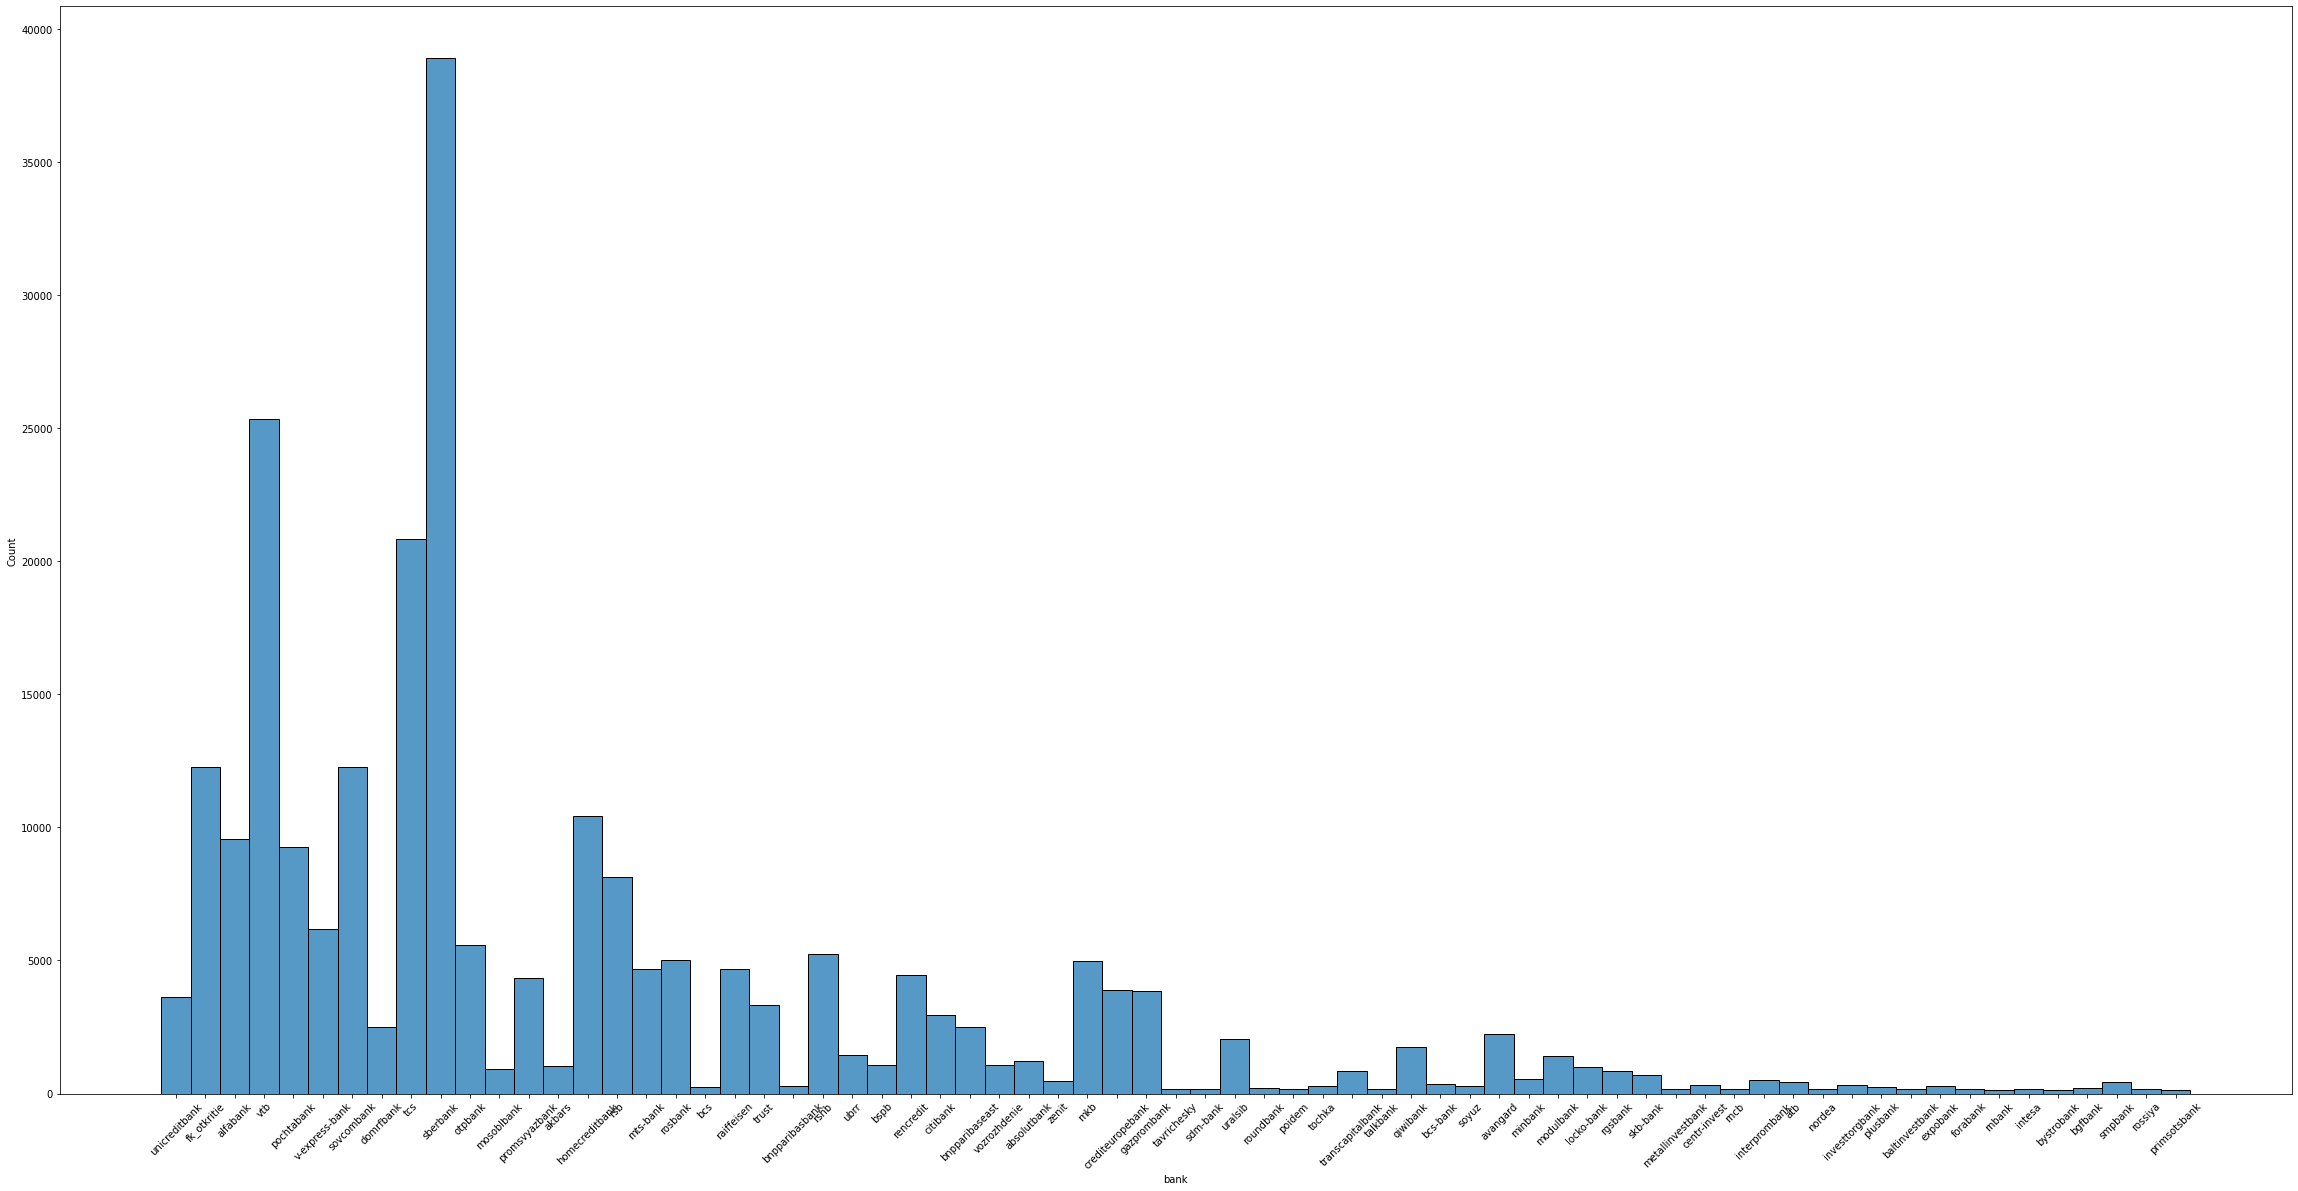

In [ ]:
plt.figure(figsize=(40,20))
sns.histplot(data=df.sort_values(by='bank'),
             x=df.bank, )
plt.xticks(rotation=45)
plt.show()

–ì–ª—è–Ω–µ–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç—Å–∫–∏—Ö –æ—Ü–µ–Ω–æ–∫

In [ ]:
df.grades.value_counts().sort_index()

1    129814
2     25803
3     11131
4      7094
5     66408
Name: grades, dtype: int64

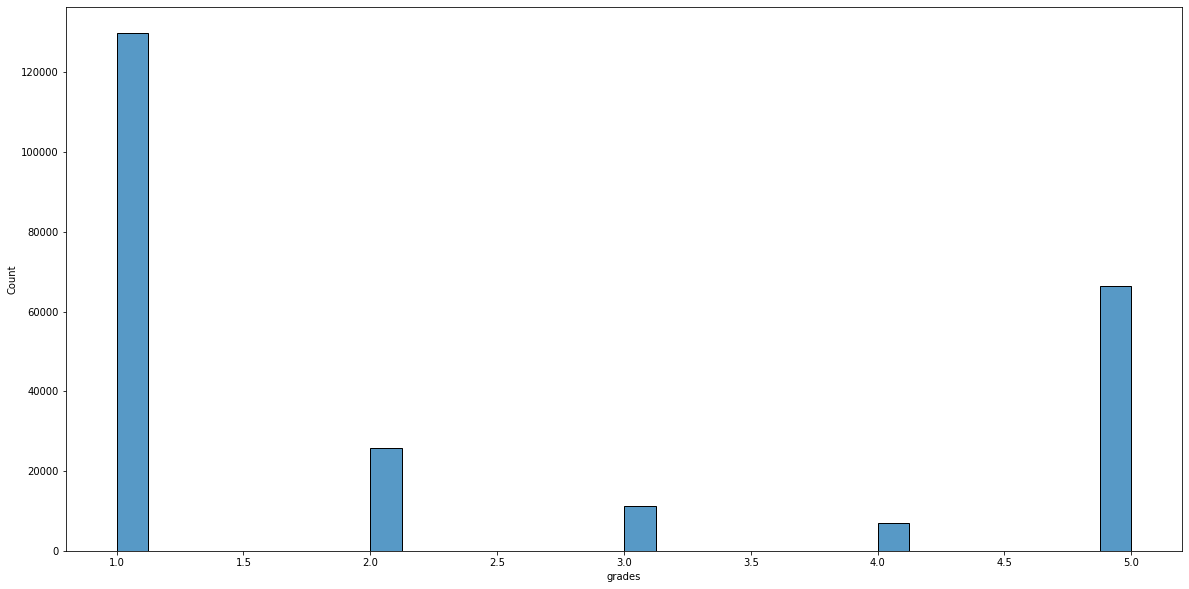

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df,
             x=df.grades, )
plt.show()

–¢–∞–∫–∂–µ –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç –¥–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–æ–≤

In [ ]:
df['sym_len'] = df.feeds.apply(len)
df['word_len'] = df.feeds.apply(lambda x: len(x.split()))

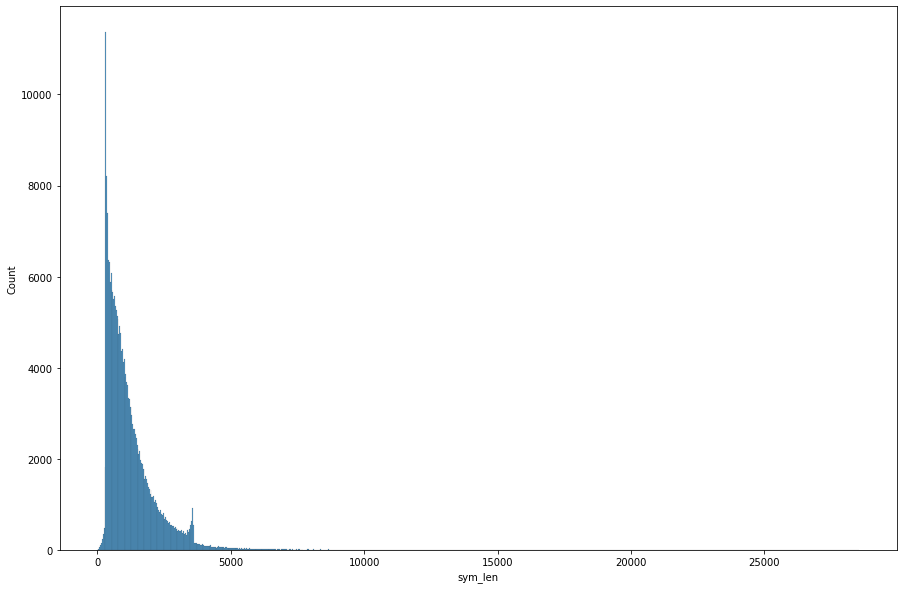

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df.sym_len)
plt.show()

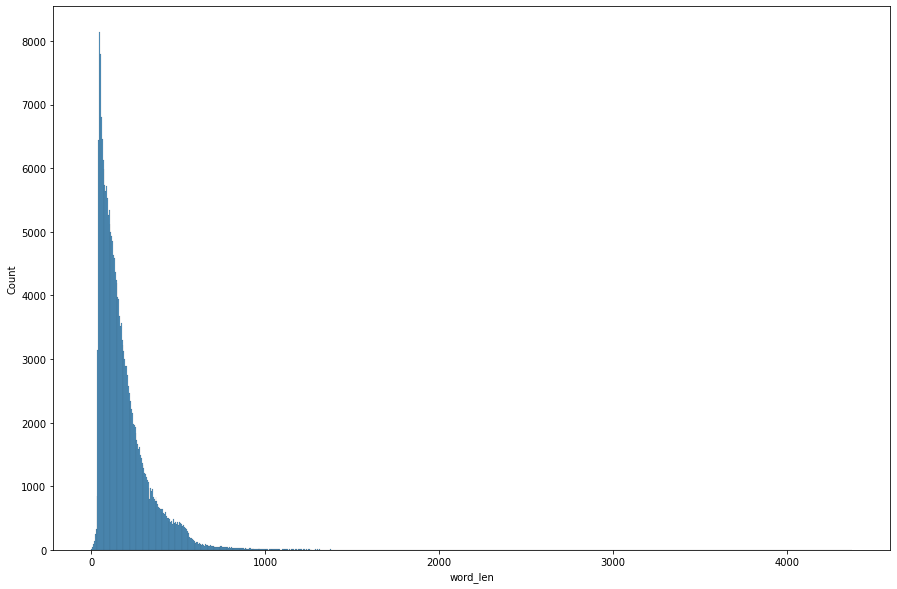

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df.word_len)
plt.show()

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã

# Baseline (tf-idf + logreg)

–ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ (–≤–∑—è—Ç–æ –∏–∑ –Ω–æ—É—Ç–±—É–∫–∞ –≤—Ç–æ—Ä–æ–≥–æ –∑–∞–Ω—è—Ç–∏—è üòÉ)

In [ ]:
m = MorphAnalyzer()
regex = re.compile("[–ê-–Ø–∞-—èA-z]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]


mystopwords = stopwords.words('russian')
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)

    return ' '.join(remove_stopwords(lemmas))

In [ ]:
with Pool(4) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['feeds']), total=len(df)))

df['lemmas'] = lemmas
df.sample(5)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 240250/240250 [1:45:38<00:00, 37.90it/s]


bank                                              feeds  grades  \
70106   bcs-bank  –£–≤–∞–∂–∞–µ–º—ã–π –±–∞–Ω–∫ –ë–ö–°! –° –ø–µ—Ä–≤—ã—Ö –¥–Ω–µ–π –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è...       1   
293909  sberbank  –°–∏—Ç—É–∞—Ü–∏—è –Ω–∞ —Ç–µ–∫—É—â–∏–π –º–æ–º–µ–Ω—Ç 08.02.15. 21.00.–° –º...       1   
295466       mkb  –í –∫–æ–Ω—Ü–µ –∏—é–ª—è —è —É–∂–µ –ø–∏—Å–∞–ª–∞ –ø–æ –ø–æ–≤–æ–¥—É –Ω–∞–≤—è–∑—ã–≤–∞–Ω–∏...       1   
277828       vtb  –°–µ–≥–æ–¥–Ω—è –≤ 11:43 –º–Ω–µ –ø–æ–∑–≤–æ–Ω–∏–ª —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ö–¶, –∫–æ—Ç...       1   
221435  alfabank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å.–í –∞–≤–≥—É—Å—Ç–µ –æ—Ñ–æ—Ä–º–∏–ª —Å–µ–±–µ –∫–∞—Ä—Ç—É Alfa-...       1   

                      date  sym_len  word_len  \
70106  2021-01-31 01:10:00     1583       219   
293909 2015-02-08 21:03:00     3124       435   
295466 2016-09-07 21:10:00     1295       203   
277828 2020-04-02 21:12:00      958       154   
221435 2019-01-29 05:55:00      854       135   

                                                   lemmas  
70106   —É–≤–∞–∂–∞–µ–º—ã–π –±–∞–Ω–∫ –ø–µ—Ä–≤—ã–π –¥–µ–Ω—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —Å—Ä–∞–≤–Ω–∏...  
293909  —Å–∏—Ç—É–∞—Ü–∏—è —Ç–µ–∫—É—â–∏–π –º–æ–º–µ–Ω—Ç —Å–æ—Ü–∏–∞–ª—å–Ω—ã–π –±–∞–Ω–∫–æ–≤—Å–∫–∏–π ...  
295466  –∫–æ–Ω–µ—Ü –∏—é–ª—å –ø–∏—Å–∞—Ç—å –ø–æ–≤–æ–¥ –Ω–∞–≤—è–∑—ã–≤–∞–Ω–∏–µ –¥–æ–≥–æ–≤–æ—Ä —Å—Ç...  
277828  —Å–µ–≥–æ–¥–Ω—è –ø–æ–∑–≤–æ–Ω–∏—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ–±—â–∏—Ç—å –æ...  
221435  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å –∞–≤–≥—É—Å—Ç –æ—Ñ–æ—Ä–º–∏—Ç—å –∫–∞—Ä—Ç–∞ alfa travel ...

–ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ —Ç–µ–∫—Å—Ç–∞—Ö –æ—Ç–∑—ã–≤–æ–≤ (–ø—Ä–∏–∑–Ω–∞–∫–∏ `bank`–∏ `date` –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º –æ—Ç —Å–ª–æ–≤–∞ —Å–æ–≤—Å–µ–º -- **–º—ã –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º, –∞ –≤—ã –≤ —Å–≤–æ–∏—Ö —Ä–µ—à–µ–Ω–∏—è—Ö –ø–æ–ø—Ä–æ–±—É–π—Ç–µ**)

In [ ]:
y_train = df.grades
y_train = y_train.reset_index().drop(columns='index')
del df # –≤—ã—Å–≤–æ–±–æ–¥–∏–º –æ–ø–µ—Ä–∞—Ç–∏–≤—É, –æ–Ω–∞ –Ω–∞–º –Ω–µ –ø–æ–º–µ—à–∞–µ—Ç

–û–±—É—á–∏–º—Å—è –Ω–∞ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–∞—Ö, –∞ –ø–æ—Ç–æ–º —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–µ –∏–∑ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è. –ù–∏ –±–æ–ª—å—à–µ, –Ω–∏ –º–µ–Ω—å—à–µ

In [ ]:
%%time
vec = TfidfVectorizer() # –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º–º—ã
bow = vec.fit_transform(lemmas)
clf = LogisticRegression(random_state=42, max_iter=500, warm_start=True)


CPU times: user 23.6 s, sys: 247 ms, total: 23.9 s
Wall time: 23.9 s


In [ ]:
# –Ω–µ–±–æ–ª—å—à–æ–π —Ç—Ä—é–∫: –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è —á–∞—Å—Ç—è–º–∏
ran = np.arange(y_train.shape[0])
inds = np.array_split(ran, 100) # —Ä–∞–∑–æ–±—ä–µ–º –Ω–∞ 100 —á–∞—Å—Ç–µ–π
# –∏ –ø–æ–¥–º–µ—à–∞–µ–º –∫ –∫–∞–∂–¥–æ–º—É –∫—É—Å–∫—É —Å–ª—É—á–∞–π–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤
inds = [np.concatenate((chunk, np.array(random.sample(list(ran), k=5_000))), axis=None) for chunk in inds]

for chunk in tqdm(inds):
    clf.fit(bow[chunk, :], y_train.iloc[chunk])


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [35:41<00:00, 21.42s/it]


–ó–∞–≥—Ä—É–∑–∏–º —Ç–µ—Å—Ç. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–µ–º –æ—Ç–∑—ã–≤—ã –≤ –Ω–µ–º –∏ —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [ ]:
test = pd.read_csv('new_test_dl.csv', index_col=0)
test

bank                                              feeds  \
0            sberbank  –ò—Å—Ç–æ—Ä–∏—è —Ç–∞–∫–æ–≤–∞: 27.01.2015 –º–Ω–µ –Ω–∞ —Ç–µ–ª–µ—Ñ–æ–Ω –ø—Ä–∏—à...   
1            alfabank  –ù–µ–ª—å–∑—è —Ä–µ—à–∏—Ç—å –Ω–∏ –æ–¥–∏–Ω –≤–æ–ø—Ä–æ—Å –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ, –∞–≤—Ç–æ–æ...   
2                 tcs  –ë—ã—Å—Ç—Ä–æ, —É–¥–æ–±–Ω–æ, —á–µ–≥–æ –µ—â—ë –Ω—É–∂–Ω–æ —Ç–æ. –ù–∞ —Å–∞–π—Ç–∏–∫–µ ...   
3          pochtabank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ü—Ä–æ—Å—Ç–æ –≤ —à–æ–∫–µ –æ—Ç ¬†–ü–ê–û ¬´–ü–æ—á—Ç–∞ –ë–∞–Ω–∫...   
4            sberbank  –í —Ç–µ—á–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–Ω–µ–π –Ω–æ–≤–æ–≥–æ–¥–Ω–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ 20...   
...               ...                                                ...   
34109        alfabank  –ù–∏–∫–æ–≥–¥–∞ –Ω–µ –¥—É–º–∞–ª, —á—Ç–æ –ê–ª—å—Ñ–∞ –±–∞–Ω–∫ —Ç–∞–∫–æ–π —É–∂–∞—Å–Ω—ã–π...   
34110  v-express-bank  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –î–∞–∞–∞–∞ —É–∂–∂–∂–∂... –≤—Å–µ–≥–¥–∞ –≤—ã–±–∏—Ä–∞–ª–∞ –∏–º...   
34111             rsb  –ü—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ –ø–∏—Å–∞—Ç—å –æ–± –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ —ç—Ç–æ–≥–æ...   
34112         rosbank  –Ø –¥–æ–ª–≥–æ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–∞—é —Å –†–æ—Å–±–∞–Ω–∫–æ–º, –Ω–µ –æ–¥–∏–Ω –∫—Ä–µ–¥–∏...   
34113      raiffeisen  –Ø–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ 2,5 –≥–æ–¥–∞. –°–Ω–∞—á–∞–ª–∞ –≤—Å–µ –±...   

                   date  
0      05.02.2015 17:33  
1       03.03.2021 9:27  
2       09.04.2018 7:40  
3       09.04.2020 9:57  
4      12.01.2012 14:00  
...                 ...  
34109  23.06.2019 12:40  
34110   20.12.2013 3:46  
34111  13.11.2011 17:20  
34112   28.02.2017 9:24  
34113  25.12.2008 15:21  

[34114 rows x 3 columns]

In [ ]:
with Pool(4) as p:
    lemmas_test = list(tqdm(p.imap(clean_text, test['feeds']), total=len(test)))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34114/34114 [15:32<00:00, 36.60it/s]


In [ ]:
pred = clf.predict(vec.transform(lemmas_test))
pred

array([1, 1, 5, ..., 1, 1, 1])

In [ ]:
sol = pd.DataFrame({'inds': test.index,
                    'grades': pred})
sol

inds  grades
0          0       1
1          1       1
2          2       5
3          3       1
4          4       1
...      ...     ...
34109  34109       1
34110  34110       1
34111  34111       1
34112  34112       1
34113  34113       1

[34114 rows x 2 columns]

In [ ]:
sol.to_csv('new_baseline_DL.csv', index=False)

–ö—Å—Ç–∞—Ç–∏, –µ—Å–ª–∏ –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –≤–µ–∫—Ç–æ—Ä–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤, —Ç–æ –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ –∑–∞–º–µ—Ç–∏—Ç–µ, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Å—ã 1 –∏ 5, —Ä–µ–¥–∫–æ -- 2 –∏ 3 –∏ –≤–æ–æ–±—â–µ –Ω–∏–∫–æ–≥–¥–∞ –∫–ª–∞—Å—Å 4. –û—Ç—á–∞—Å—Ç–∏ —ç—Ç–æ –ª–æ–≥–∏—á–Ω–æ -- –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤. –ù–æ —ç—Ç–æ—Ç –Ω–µ–¥–æ—á–µ—Ç –Ω–µ–ø–ª–æ—Ö–æ –±—ã –∏—Å–ø—Ä–∞–≤–∏—Ç—å –≤ –≤–∞—à–∏—Ö —Ä–µ—à–µ–Ω–∏—è—Ö

In [ ]:
unique, counts = np.unique(pred, return_counts=True)
np.asarray((unique, counts)).T

array([[    1, 24755],
       [    2,    84],
       [    3,     2],
       [    5,  9273]])